In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import json
import pymongo
import datetime

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

# set seed for reproducibility
np.random.seed(0)
!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo



# Import the required libraries
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing


  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-2j1nsxbq\numpy_e0ba5585ef59436c9d82d87d900a031d\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:


  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-ldzy58pw\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-ldzy58pw\f2py.exe


  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries openblas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
  get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
  customize GnuFCompiler
  Could not locate executable g77
  Could not locate executable f77
  customize IntelVisualFCompiler
  Could not locate executable ifort
  Could not locate executable ifl
  customize AbsoftFCompiler
  Could not locate executable f90
  customize CompaqVisualFCompiler
  Found executable C:\Users\ajarir\anaconda3\Library\usr\bin\DF.exe
  customize IntelItaniumVisualFCompiler
  Could not locate executable efl
  customize Gnu95FCompiler
  Could not locate executable gfortran
  Cou

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


In [31]:
train = pd.read_csv("BigMart_Train.csv") 
test = pd.read_csv("BigMart_Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

['Medium' nan 'High' 'Small']


<AxesSubplot:>

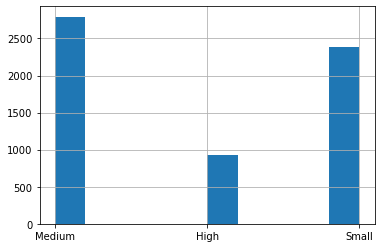

In [33]:
# Now check the unique values of "Item_Fat_Content"
print(train["Outlet_Size"].unique())

# Plot a histogram of the values
train["Outlet_Size"].hist()


In [34]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train['Outlet_Size']= label_encoder.fit_transform(train['Outlet_Size'])

train['Outlet_Size'].unique()


array([1, 3, 0, 2])

In [35]:


# Read the data into a DataFrame
data = pd.read_csv("BigMart_Train.csv")

# Calculate the average value for each column
item_weight_mean = train['Item_Weight'].mean()
outlet_size_mean = train['Outlet_Size'].mean()

# Fill the missing values with the average value
train['Item_Weight'].fillna(item_weight_mean, inplace=True)
train['Outlet_Size'].fillna(outlet_size_mean, inplace=True)

# Print the data to check the missing values have been filled
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [36]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

['Low Fat' 'Regular' 'reg']


<AxesSubplot:>

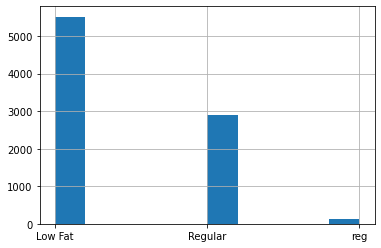

In [37]:
# Replace 'LF' and 'low fat' with 'Low Fat'
train["Item_Fat_Content"].replace(to_replace =["LF", "low fat"], value = "Low Fat", inplace=True)

# Verify the changes
print(train["Item_Fat_Content"].unique())
train["Item_Fat_Content"].hist()


['Low Fat' 'Regular']


<AxesSubplot:>

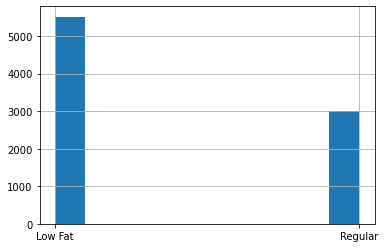

In [38]:
# Create a dictionary to map the inconsistent values to a consistent value
fat_content_map = {"Regular": "Regular", "reg": "Regular"}

# Use the replace() method to replace the values in the "Item_Fat_Content" column
train["Item_Fat_Content"].replace(fat_content_map, inplace=True)

# Now check the unique values of "Item_Fat_Content"
print(train["Item_Fat_Content"].unique())

# Plot a histogram of the values
train["Item_Fat_Content"].hist()


In [39]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train['Item_Fat_Content']= label_encoder.fit_transform(train['Item_Fat_Content'])

train['Item_Fat_Content'].unique()


array([0, 1])

# Encode 

In [40]:
# Create a dictionary with the mapping of the values
mapping = {'Dairy': 'Food', 'Soft Drinks': 'Drink', 'Meat': 'Food', 'Household': 'Non-consumable',
           'Baking Goods': 'Food', 'Snack Foods': 'Food', 'Fruits and Vegetables': 'Food',
           'Breakfast': 'Food', 'Health and Hygiene':'Food', 'Frozen Foods' : 'Food','Hard Drinks': 'Food', 'Canned': 'Food', 'Starchy Foods': 'Food', 'Breads': 'Food', 'Others': 'Non-consumable', 'Seafood': 'Food'}

# Replace the values in the 'Item_Type' column with the new categories
train['Item_Type'] = train['Item_Type'].replace(mapping)

print(train['Item_Type'].unique())



['Food' 'Drink' 'Non-consumable']


<AxesSubplot:>

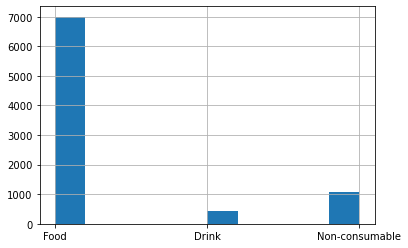

In [41]:
train['Item_Type'].hist()

In [52]:
#Mark non-consumables as separate category in item_type:
train.loc[train['Item_Type']=="Non-consumable",'Item_Type'] = "Non-Edible"
train['Item_Type'].value_counts()


1    6999
2    1079
0     445
Name: Item_Type, dtype: int64

<AxesSubplot:>

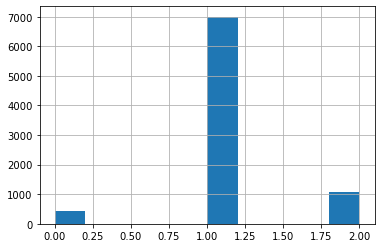

In [53]:

# Encode labels in column 'species'.
train['Item_Type']= label_encoder.fit_transform(train['Item_Type'])


#train['Item_Type'].unique()
train['Item_Type'].hist()


<AxesSubplot:>

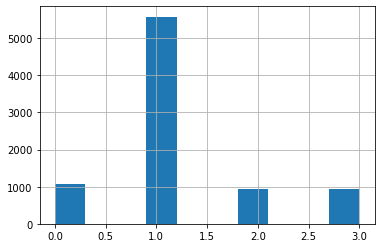

In [54]:
train['Outlet_Type'].hist()


<AxesSubplot:>

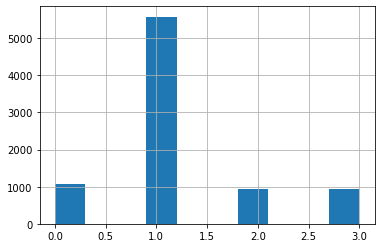

In [55]:
# Encode labels in column 'species'.
train['Outlet_Type']= label_encoder.fit_transform(train['Outlet_Type'])

train['Outlet_Type'].hist()


# Normlize

In [62]:

# Encode labels in column 'species'.
train['Outlet_Location_Type']= label_encoder.fit_transform(train['Outlet_Location_Type'])


train['Outlet_Location_Type'].unique()



array([0, 2, 1], dtype=int64)

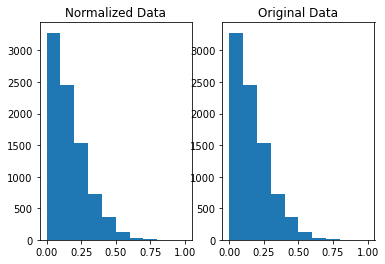

In [65]:

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Item_Outlet_Sales' column
scaled_sales = scaler.fit_transform(train[['Item_Outlet_Sales']])

# Save the scaled values to the original dataset
train['Item_Outlet_Sales'] = scaled_sales


plt.subplot(1, 2, 1)
plt.hist(train['Item_Outlet_Sales'])
plt.title('Normalized Data')

plt.subplot(1, 2, 2)
plt.hist(train['Item_Outlet_Sales'])
plt.title('Original Data')

plt.show()

# Create a LR

Train score:  0.4961475150681338
Test score:  0.5003632891009973
R^2: 0.5003632891009973
Root Mean Squared Error: 0.09263931078643982


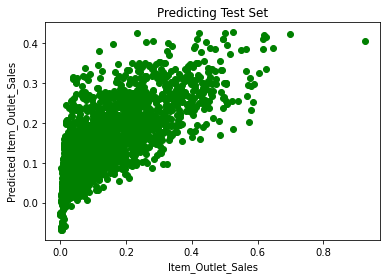

In [66]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#evaluate the model
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = lin_reg.predict(X_test)


# evaluate the model
print("R^2: {}".format(lin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



Train score:  0.49614750979044353
Test score:  0.5003634772715352
R^2: 0.5003634772715352
Root Mean Squared Error: 0.09263929334177433


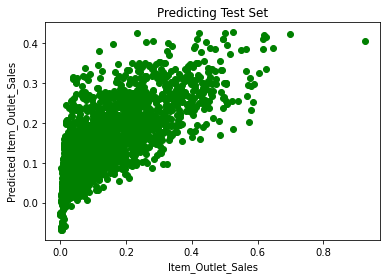

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the Ridge regression model with regularization parameter alpha = 0.5
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

#evaluate the model
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = ridge.predict(X_test)


# evaluate the model
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



# Random Forest model

Train score:  0.9332097845014773
Test score:  0.5194959253416204
R^2: 0.5194959253416204
Root Mean Squared Error: 0.0908482743566758


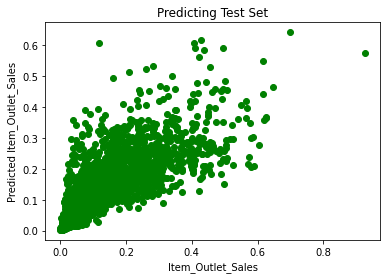

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

#evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = rf.predict(X_test)

# evaluate the model
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()


# XGB Model


Train score:  0.5566976717418182
Test score:  0.5487409748821028
R^2: 0.5487409748821028
Root Mean Squared Error: 0.0880402151901347


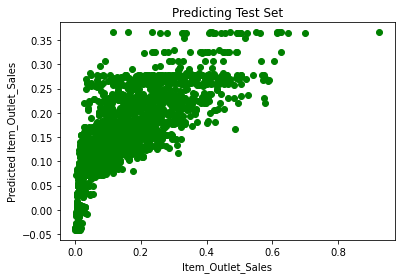

In [69]:

import xgboost as xgb
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

#evaluate the model
train_score = xg_reg.score(X_train, y_train)
test_score = xg_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = xg_reg.predict(X_test)

# evaluate the model
print("R^2: {}".format(xg_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()